<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>  

# Challenge: Tipos de Gráficos
## Caso : Sample Orders 


# 0. Objetivo

El objetivo de este worksheet es prácticar sobre los principiales tipos de gráficos que podemos utilizar en Data Science para ** analizar la relación entre nuestros datos**  y **responder preguntas** . 

No nos olvidemos que en Data Visualization vamos a buscar:

* **Explorar**
* **Explicar**

nuestros datos




# 1. Visión general del problema.

Nuestra empresa ACME, nos ha proporcionado las ordenes de ventas de nuestros productos 



In [1]:
## importing the necessary packages
%matplotlib inline
import  numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Obtención de los datos

Antes de importar los datos vamos a definir una serie de parámetros que aplicaremos a todos los gráficos. 

Estos pueden ser reescritos en cada gráfico. 



In [2]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired

# Plot size to 14" x 7"
plt.rc('figure', figsize = (8, 5))
# Font size to 14
plt.rc('font', size = 14)
# Do not display top and right frame lines
plt.rc('axes.spines', top = False, right = False)
# Remove grid lines
plt.rc('axes', grid = False)
# Set backgound color to white
plt.rc('axes', facecolor = 'white')


Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas.


In [3]:
data_path = 'orders.csv'
df_datos = pd.read_csv(data_path)

df_datos['order_Dte'] = pd.to_datetime(df_datos['order_Dte']) # Tratamiento para fechas


Vamos a responder a nuestra primera pregunta 
## P.0 ¿hemos cargado bien los datos?

Vamos a responder con una tabla

In [4]:
df_datos.head()

,order_id,Priority,Cust_id,Segment,City,Category,Subcategory,Container,Profit,Quantity,Sales,Mode,order_Dte,Mnth,Year
0,9285,Critical,949,Consumer,Dortmund,Office Supplies,Accessories,Small Box,-18,3,122,Regular Air,2013-01-01,1,2013
1,88028,Not Specified,2211,HomeOffice,Pretoria,Office Supplies,Storage,Large Box,-411,2,186,Express Air,2013-01-01,1,2013
2,88296,High,2579,HomeOffice,Charleston,Furniture,Tables,Jumbo Box,-265,1,204,Delivery Truck,2013-02-01,1,2013
3,89536,Critical,890,Consumer,Voronezh,Technology,Telephones,Small Box,440,6,766,Regular Air,2013-04-01,1,2013
4,86122,Not Specified,1085,HomeOffice,Istanbul,Office Supplies,Paper,Wrap Bag,-39,6,46,Regular Air,2013-04-01,1,2013


## C0 - ¿Cómo son las ventas ?

Vamos a responder con un gráfico: 
Eje de las X : variable como Order_dte,Mnth, Year, Quarter..  
También podemos crearnos una nueva:   
df_datos['anio_mes'] = df_datos['order_Dte'].dt.strftime('%Y/%m')  
En el eje de las Y , Sales, Profit, Quantity....  

In [5]:
df_datos['anio_mes'] = df_datos['order_Dte'].dt.strftime('%Y/%m')

Text(0.5, 1.0, 'Sales Year/Month')

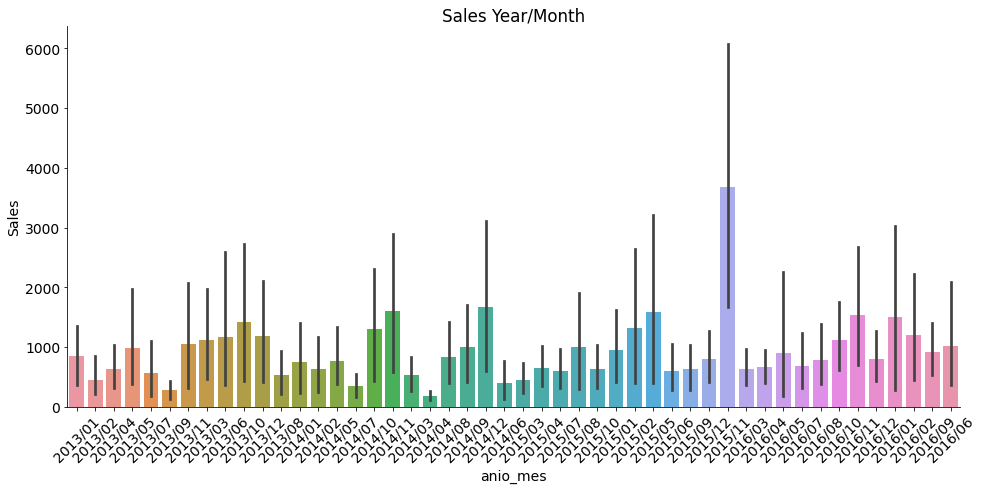

In [6]:
#Creamos una figura 
#Aquí seleccionamos el grafico de Seaborn que mejor representa la evolución sns.<elegimos el gráfico> ...
# recuerda añadir ax= <nombre de la figura ax> para que nos lo dibuje dentro de la figura
fig, ax = plt.subplots(figsize = (16, 7))
sns.barplot(x="anio_mes", y="Sales", data=df_datos, ax = ax);
# En caso que no quepa en horizontal los nombres del eje x se puede poner en vertical
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Sales Year/Month')

### Pregunta: 
¿Con qué detalle queda más claro el gráfico ?
Con día, mes, mes año, año, trimestre...

Una forma de ver la evolución es por años,  en este caso grafica la evolución en barras, cada barra es un año. 

Text(0.5, 0.98, 'Evolucion de Ventas ')

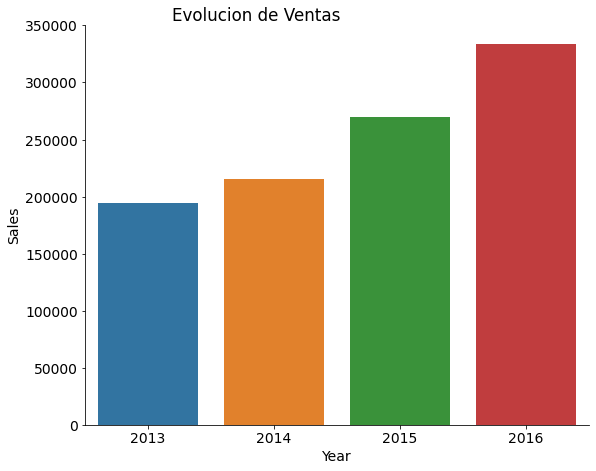

In [7]:
g = sns.catplot(x='Year', y='Sales',data=df_datos ,kind='bar', estimator=sum,ci=0,ax=ax)
g.fig.set_figwidth(10)
g.fig.set_figheight(7)
g.fig.suptitle("Evolucion de Ventas ")

## C1 - ¿Cómo son las ventas por año y   categoría ?

Text(0.5, 0.98, 'Evolucion de Ventas por Categoria ')

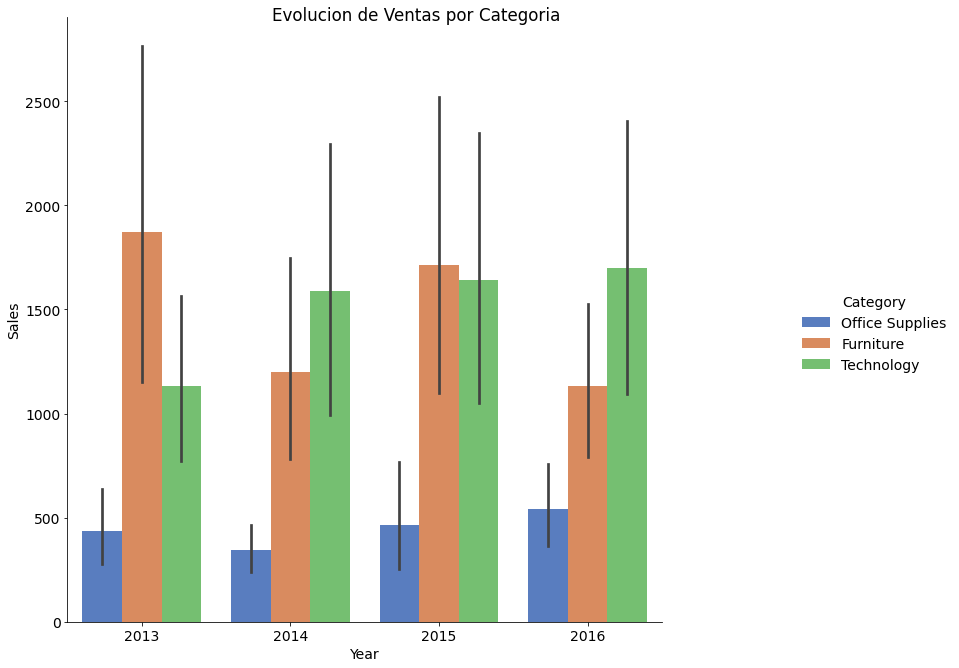

In [8]:
#Hemos creado una figura con dos gráficos para que compares distintos formatos. 

#data_grouped = df_datos.groupby(['Year','Category']).agg({'Sales':'count'})

#data_grouped.info()

#fig = plt.figure(figsize=(8,6))
#fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

#ax0=ax[0]
#ax1=ax[1]
## en el primer grafico que crees recuerda poner ax=ax0 para que aparezca a la izquierda
## en el segundo ax=ax1 para que aparezca a la derecha. 

g = sns.catplot(x="Year", y="Sales", hue="Category", data=df_datos,
                height=6, kind="bar", palette="muted",)
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.fig.suptitle("Evolucion de Ventas por Categoria ")

#sns.catplot() # completa
#
#sns.catplot() # completa
#
##plt.close(2)
##plt.close(3)
#


Vamos a comparar las ventas de todas las categoría con las ventas respecto a una sóla categoria. 

In [9]:
df_Furniture=df_datos[df_datos['Category']=='Furniture']

In [10]:
df_Furniture.head()

,order_id,Priority,Cust_id,Segment,City,Category,Subcategory,Container,Profit,Quantity,Sales,Mode,order_Dte,Mnth,Year,anio_mes
2,88296,High,2579,HomeOffice,Charleston,Furniture,Tables,Jumbo Box,-265,1,204,Delivery Truck,2013-02-01,1,2013,2013/02
8,90166,Critical,896,Corporate,Ryazan,Furniture,Furnishings,Wrap Bag,33,6,52,Regular Air,2013-09-01,1,2013,2013/09
17,90000,Not Specified,1989,HomeOffice,Tijuana,Furniture,Chairs,Jumbo Drum,853,8,2885,Delivery Truck,2013-01-21,1,2013,2013/01
20,86899,High,3155,Corporate,Nantes,Furniture,Chairs,Jumbo Drum,56,4,106,Delivery Truck,2013-01-25,1,2013,2013/01
24,86051,Low,2204,HomeOffice,Davangere,Furniture,Chairs,Jumbo Drum,-152,5,167,Delivery Truck,2013-03-02,2,2013,2013/03


Text(0.5, 0.98, 'Evolucion de Ventas por Categoria ')

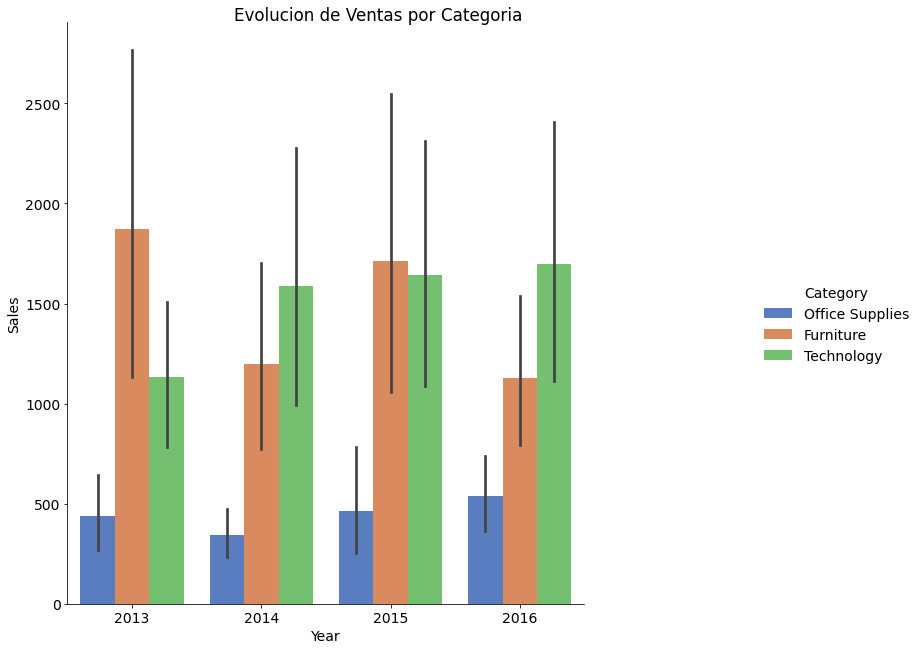

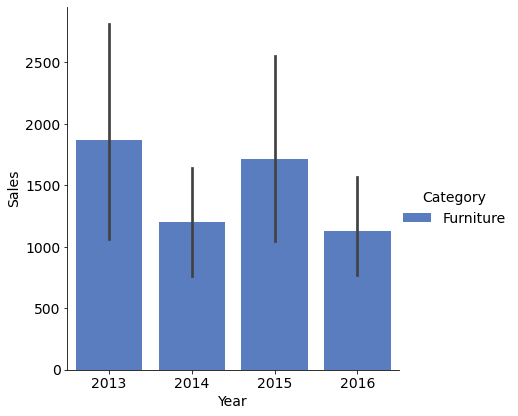

In [11]:

g = sns.catplot(x="Year", y="Sales", hue="Category", data=df_datos,
                 palette="muted",kind='bar')



g2 = sns.catplot(x="Year", y="Sales", hue="Category", data=df_Furniture,
                height=6, kind="bar", palette="muted")
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.fig.suptitle("Evolucion de Ventas por Categoria ")




In [12]:
df_Office=df_datos[df_datos['Category']=='Office Supplies']
df_Technology=df_datos[df_datos['Category']=='Technology']

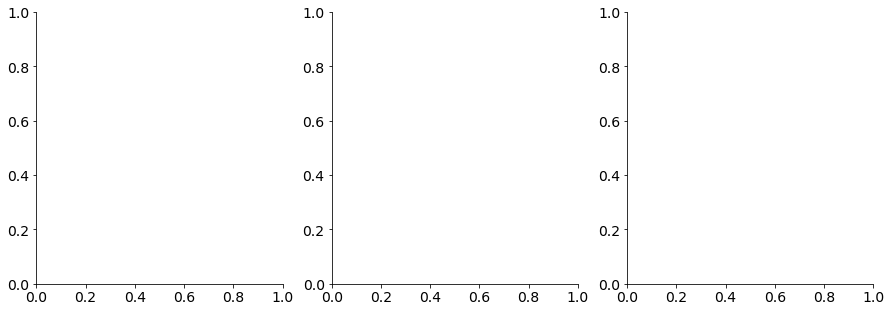

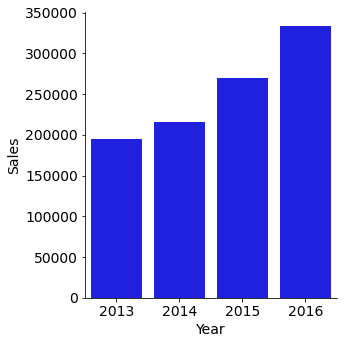

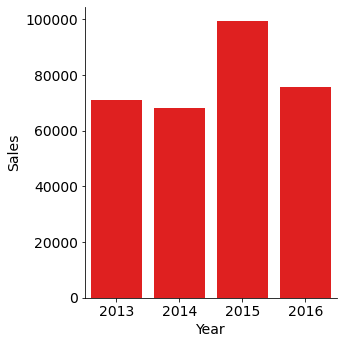

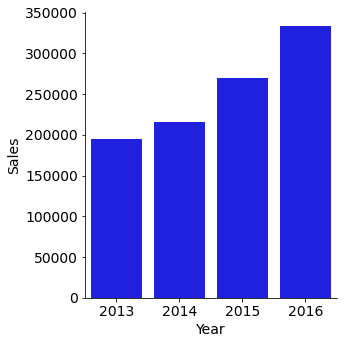

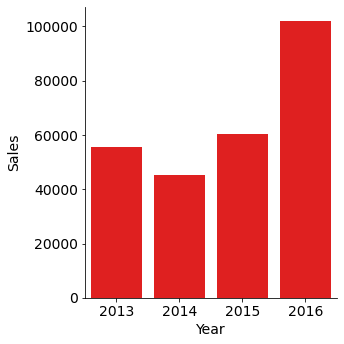

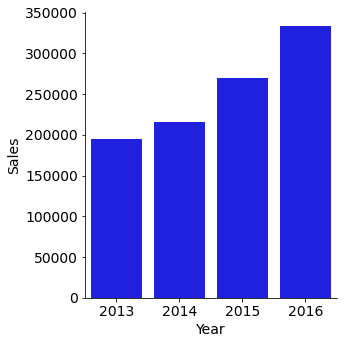

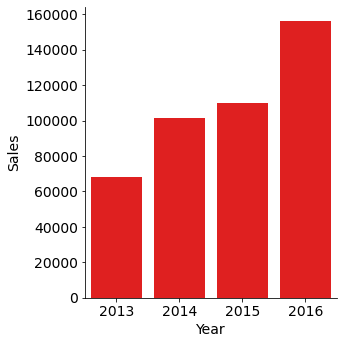

In [38]:

fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax0=ax[0]
ax1=ax[1]
ax2=ax[2]
sns.catplot(x='Year', y="Sales",data=df_datos,kind='bar',color="b", estimator=sum,ci=0,ax=ax0)
sns.catplot(x='Year', y="Sales",data=df_Furniture,kind='bar',color="r", estimator=sum,ci=0,ax=ax0)

sns.catplot(x='Year', y="Sales",data=df_datos,kind='bar',color="b", estimator=sum,ci=0,ax=ax1)
sns.catplot(x='Year', y="Sales",data=df_Office,kind='bar',color="r", estimator=sum,ci=0,ax=ax1)

sns.catplot(x='Year', y="Sales",data=df_datos,kind='bar',color="b", estimator=sum,ci=0,ax=ax2)
sns.catplot(x='Year', y="Sales",data=df_Technology,kind='bar',color="r", estimator=sum,ci=0,ax=ax2)

#plt.close(2)
#plt.close(3)
#plt.close(4)
#plt.close(5)
#plt.close(6)
#plt.close(7)
#

## Distribuciones- Histogramas

In [ ]:
df_diarios=df_datos[df_datos['Sales']>2000]

In [ ]:
df_diarios.head()

### Grafico de frecuencia - Histograma de Unidades - Quantity

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax0=ax[0]
ax1=ax[1]

# sns. displot y sns.boxplot para ver las similitudes de los gráficos

a = sns.distplot(df_datos['Quantity'],ax=ax0)
b = sns.boxplot(df_datos['Quantity'],ax=ax1)

#### La distribución de las ventas. 
Si repetimos el gráfico de arriba con Sales, veremos que más del 50% de las ventas están en el primer intervalo Hay muchas 0rdenes de venta de menos de 2500 euros y muy pocas de más de 2500 euros. 
Veamos si queda mejor agrupando en vez de por ordenes de venta por meses. 

In [ ]:
fecha=pd.Grouper(key='order_Dte', freq='M')

campos_filas=[fecha,]

campos_valores=['Sales']
agregados={np.sum}
ventas=pd.pivot_table(df_datos,
                       index=campos_filas,
#                      columns=campos_columnas,
                       values=campos_valores, # en caso de utilizar la opción 2 asterisca esta linea
                       aggfunc=agregados)

In [ ]:
ventas.head()

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax0=ax[0]
ax1=ax[1]

a = sns.distplot(ventas,ax=ax0)
b = sns.boxplot(ventas,ax=ax1)
# Completa la distribución de ventas, histograma y boxplot con el nuevo dataframe. 

### Distribución de unidades por año y categoría 

Elegir el de los siguentes graficos comentados cual representa mejor la evolución 


In [ ]:
g=sns.FacetGrid(df_datos, row="Year", col="Category", margin_titles=True)
#g=sns.FacetGrid(df_datos, row="Category", col="Year", margin_titles=True)
g.map(plt.hist, "Quantity", color="steelblue")

In [ ]:
# Otra forma de representación 
fg = sns.FacetGrid(df_datos, col="Category", row="Year", hue="Category", aspect=2.5)
fg.map(sns.kdeplot, "Sales", shade=True)
fg.set(xlim=(0, 10000));

## Q2 - Correlaciones 

In [ ]:

sns.set(style="darkgrid")
g = sns.lmplot(x="Sales", y="Quantity",data=df_datos, aspect=2,hue='Year', ci=0,fit_reg=False)
g.set_axis_labels("Ventas","Cantidad")

In [ ]:
sns.set(style="whitegrid", palette="muted")
sns.swarmplot('Year', y= 'Sales', hue = 'Category',
              palette=["r", "c", "y"], data=df_datos)

En este gráfico, podemos intuir cómo evoluciona y también contestar a la pregunta según el año, pero es bastante complicado decir a priori la evolución de cada tipo de producto. Probaremos con el gráfico de violín

In [ ]:
# creamos un violin plot de ventas 'Sales' por año y hue="Category"
g = sns.catplot(x="Year", y="Sales", hue="Category",
               data=df_datos, kind="violin")

Aunque este gráfico, es más intuitivo que el swarm y nos permite responder a la pregunta, el tipo de gráfico que considero que da más información y es más sencillo de interpretar es el de barras

In [ ]:
sns.set(style="whitegrid", palette="muted")
sns.barplot('Year', y= 'Sales', hue = 'Category',estimator=sum,
              palette=["r", "c", "y"], data=df_datos, ci=0)

In [ ]:
#A partir de esta primera representación, ya podemos observar/interpretar cosas. Por lo que parece las ventas tienden a subir en
#sobre todo en los últimos meses del año(posible estacionalidad en las ventas)

In [ ]:
#¿En qué meses del año obtengo mayores beneficios? Distribución del beneficio obtenido por meses
sns.set(style="whitegrid")
sns.regplot("Mnth","Profit",data=df_datos, x_estimator=np.mean)
sns.despine();

## C2 - PARTES 

¿Qué categoría de producto es la más vendida? 


,Quantity
Category,
Furniture,2855
Office Supplies,7934
Technology,3822


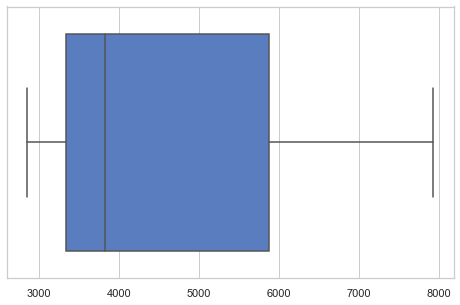

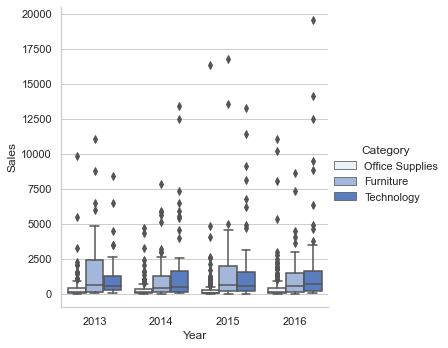

In [72]:
#Por cantidad boxplot category y quantity 
#fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
df_mas_vendidas = df_datos.groupby('Category').agg({'Quantity':'sum'})
b = sns.boxplot(df_mas_vendidas)
#df_mas_vendidas
sns.catplot(x='Year', y="Sales",data=df_datos,kind='box',color="b", hue='Category',estimator=sum,ci=0)
df_mas_vendidas

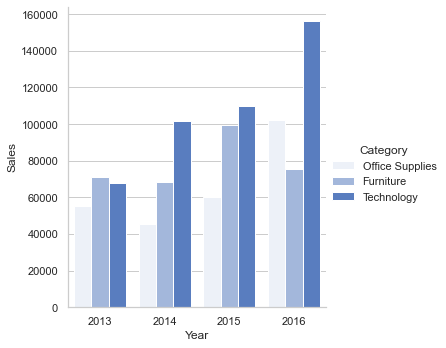

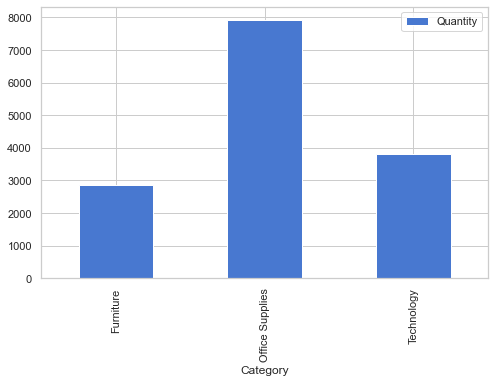

In [71]:
# Por barras catplot. 
sns.catplot(x='Year', y="Sales",data=df_datos,kind='bar',color="b", hue='Category',estimator=sum,ci=0)
df_mas_vendidas.plot(kind='bar')
#sns.catplot(data=df_mas_vendidas,kind='bar',color="b", estimator=sum,ci=0)




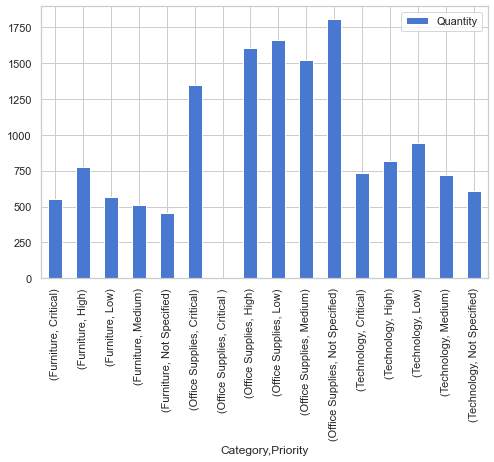

In [78]:
#Volumen de ventas por categoría y prioridad

df_mas_vendidas2 = df_datos.groupby(['Category','Priority']).agg({'Quantity':'sum'})
df_mas_vendidas2.plot(kind='bar')


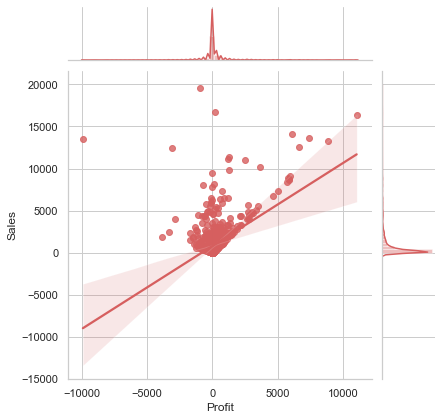

In [75]:
#¿Qué relación hay entre volumen de venta y el beneficio obtenido para cada tipo de artículo?
sns.jointplot(data=df_datos, x='Profit', y='Sales', kind='reg', color='r')
plt.show()

## Anexo- C3 - COMPARATIVAS

¿Cómo evoluciona cada categoría de producto en estos **dos** ultimos años?

En este ejercicio, simplemente vamos a filtrar por registros cuyo año de entrada sean superiores a 2014. 
En primer lugar, representamos con un gráfico de violin donde para cada tipo de producto, indicamos la comparativa de ventas en 2015 y 2016**

In [39]:
data_path = 'orders.csv'
df_datos = pd.read_csv(data_path)

df_2_Sb = df_datos[(df_datos['Year'] > 2014)]



In [40]:
#Hago un filtro para obtener solo los datos de los últimos dos años
ultimosanios=df_datos[df_datos.Year.isin([2015, 2016])]

In [41]:
ultimosanios.Year.value_counts()

2016    348
2015    255
Name: Year, dtype: int64

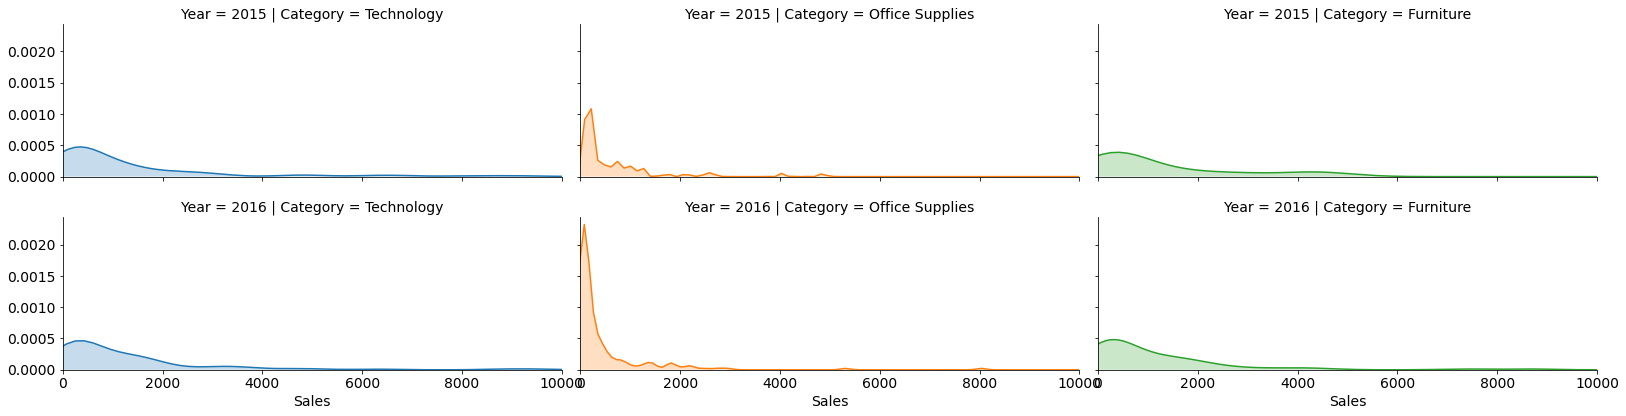

In [42]:
#Utilizamos nuestro gráfico anterior de densidad de población con el dataframe ultimosnios --> Distribución de ventas por categoría
fg = sns.FacetGrid(ultimosanios, col="Category", row="Year", hue="Category", aspect=2.5)
fg.map(sns.kdeplot, "Sales", shade=True)
fg.set(xlim=(0, 10000));

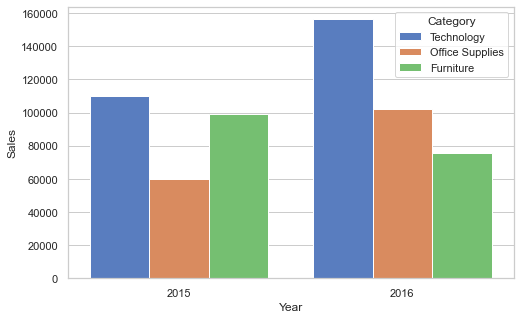

In [43]:
#A través de está visualización se ve mejor las diferencias de un año vs el otro.

sns.set(style="whitegrid", palette="muted")
sns.barplot('Year', y= 'Sales', hue = 'Category',estimator=sum,
               data=ultimosanios, ci=0)

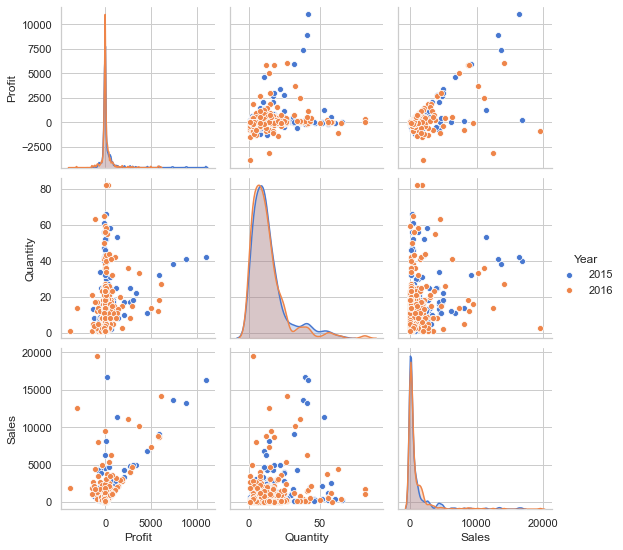

In [44]:
#df1 = ultimosanios[['Profit','Quantity','Sales','Year']]
#sns.pairplot(ultimosanios[['Profit','Quantity','Sales']], hue=ultimosanios.Year)
sns.pairplot(ultimosanios,vars=['Profit','Quantity','Sales'], hue='Year')